In [1]:
import cv2 #opencv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 


In [2]:
def bgr2rbg(img):
    result = img.copy()
    result[:,:,0] = img[:,:,2]
    result[:,:,2] = img[:,:,0]
    return result

In [3]:
def flatten(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    pmf = hist/np.sum(hist)
    cdf = np.cumsum(pmf)
    mapping = np.round(255*cdf).astype("uint8")
    imgHE_flatten = mapping[img]
    return imgHE_flatten

In [4]:
def BGR(img):
    B, G, R = cv2.split(img)
    HEB = cv2.equalizeHist(B)
    HEG = cv2.equalizeHist(G)
    HER = cv2.equalizeHist(R)
    imgHE_BGR = cv2.merge([HEB, HEG, HER])
    return imgHE_BGR

In [5]:
def HSV_SV(img):
    H, S, V = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    HES = cv2.equalizeHist(S)
    HEV = cv2.equalizeHist(V)
    imgHE_HSV = cv2.cvtColor(cv2.merge([H, HES, HEV]), cv2.COLOR_HSV2BGR)
    return imgHE_HSV

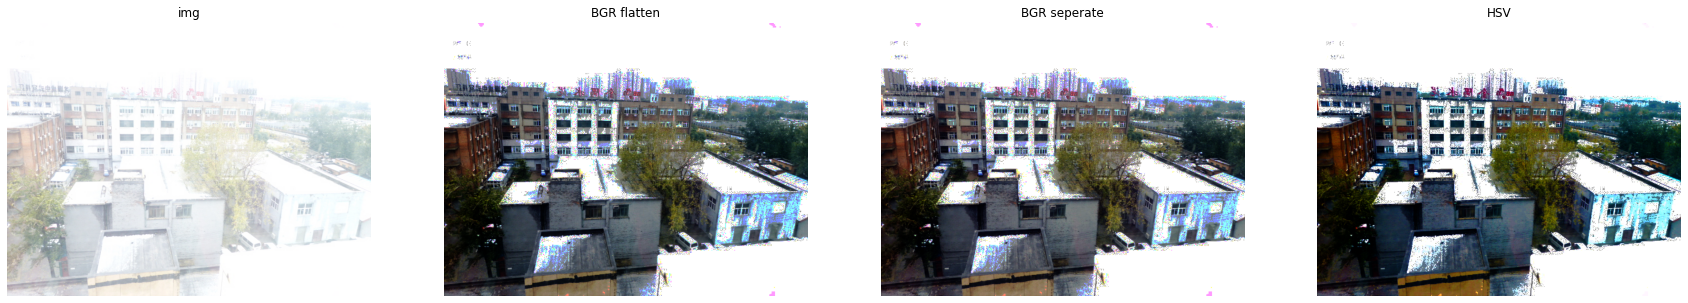

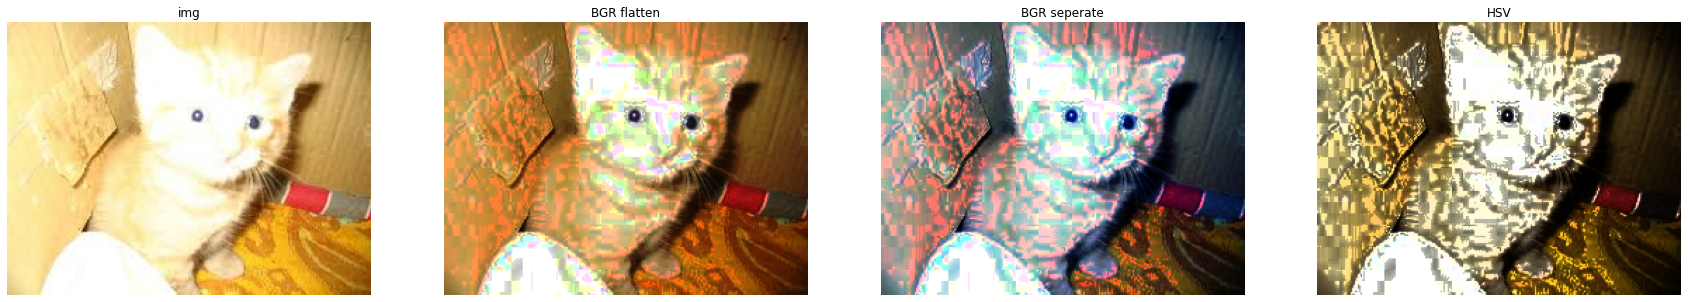

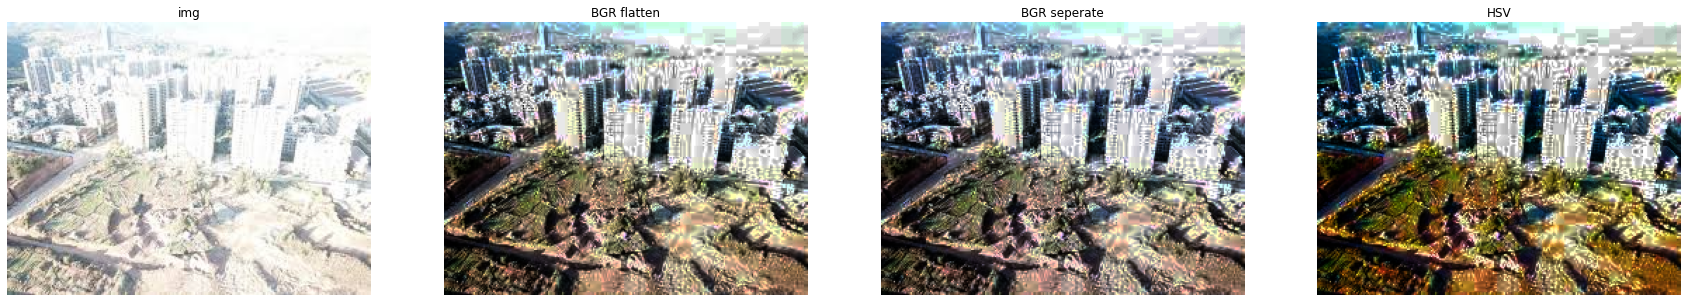

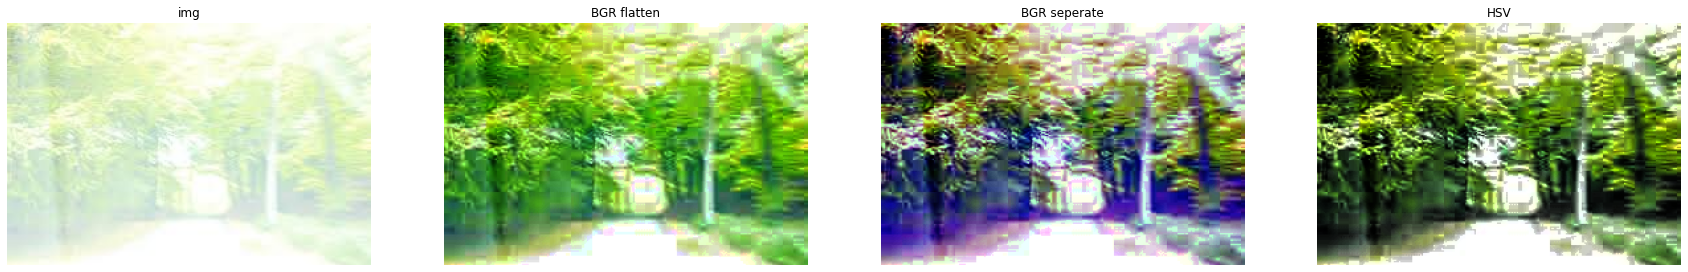

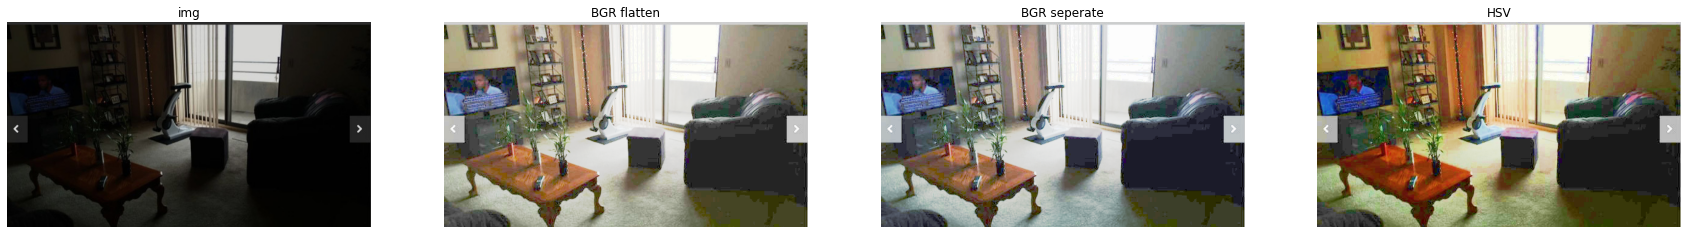

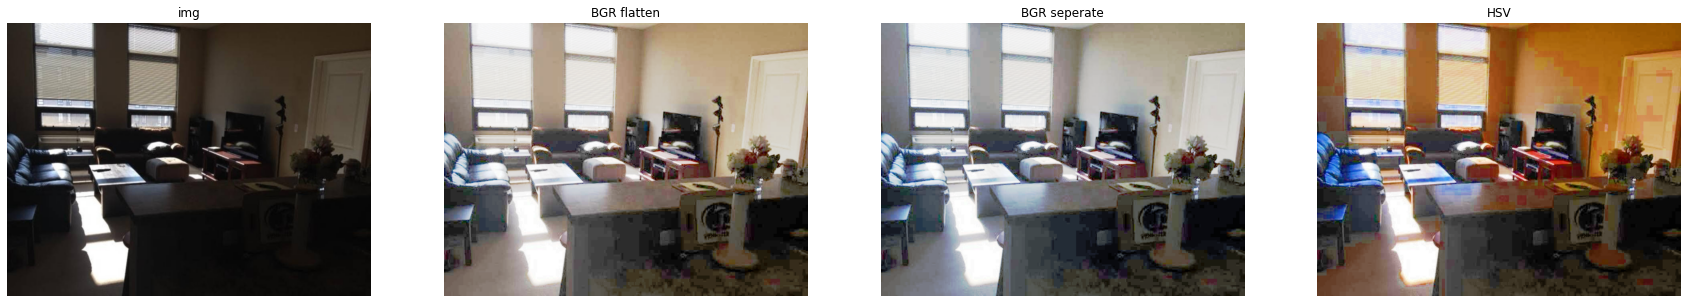

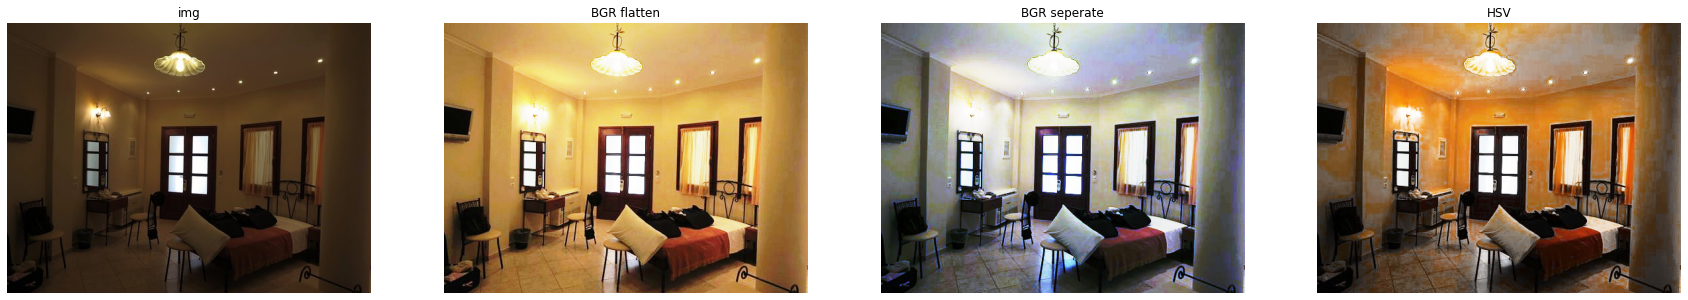

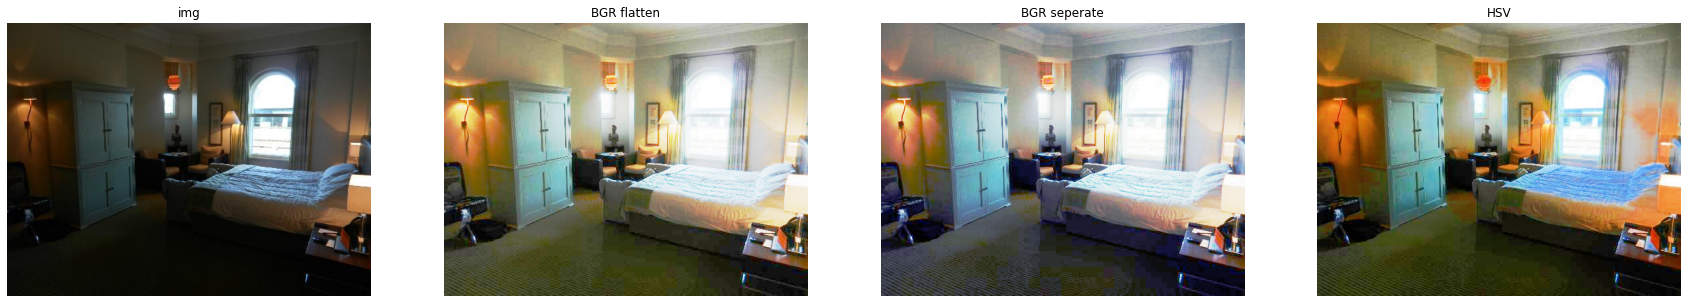

In [8]:
imgStrList = ("sample01.jpg","sample02.jpeg","sample03.jpeg","sample04.jpeg","sample05.jpeg","sample06.jpg","sample07.jpg","sample08.jpg")
colorCv2 = ("b", "g", "r")

for imgStr in imgStrList:
    img = cv2.imread(imgStr)

    imgHE_flatten = flatten(img)
    imgHE_BGR= BGR(img)
    imgHE_HSV_SV = HSV_SV(img)
    
    # display
    plt.figure(figsize=(30,120))
    plt.subplot(1,4,1)
    plt.title("img")
    plt.imshow(bgr2rbg(img))
    plt.axis("off")
    plt.subplot(1,4,2)
    plt.title("BGR flatten")
    plt.imshow(bgr2rbg(imgHE_flatten))
    plt.axis("off")
    plt.subplot(1,4,3)
    plt.title("BGR seperate")
    plt.imshow(bgr2rbg(imgHE_BGR))
    plt.axis("off")
    plt.subplot(1,4,4)
    plt.title("HSV")
    plt.imshow(bgr2rbg(imgHE_HSV_SV))
    plt.axis("off")
    
    